# PyTorch Tutorial

## Tensors
- Tensors are a data structure similar to arrays and matrices, in torch we use them to encode the inputs and outputs of a model, as well as the model's parameters
- They are similar to ndarrays, but can run on GPUs, and are optimised for automatic differentiation

In [2]:
import torch
import numpy as np

#### Initialisation

We can initialise tensors in various ways, directly from data:

In [3]:
data = [[1, 2], [3, 4]]
x_data = torch.tensor(data)

From a NumPy array

In [4]:
np_array = np.array(data)
x_np = torch.from_numpy(np_array)

From another tensor

In [5]:
x_ones = torch.ones_like(x_data)
print(f'Ones Tensor: \n {x_ones} \n')
x_rand = torch.rand_like(x_data, dtype=torch.float)
print(f'Random Tensor: \n {x_rand} \n')

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.4268, 0.4204],
        [0.5741, 0.5577]]) 



With random or constant values

In [6]:
shape = (2,3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

Random Tensor: 
 tensor([[0.1061, 0.4345, 0.1067],
        [0.4661, 0.6964, 0.9460]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


#### Attributes

In [7]:
tensor = torch.rand(3,4)

print(f'Shape of tensor: {tensor.shape}')
print(f'Datatype of tensor: {tensor.dtype}')
print(f'Device tensor is stored on: {tensor.device}')

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


#### Operations

By default, tensors are created on the CPU, we can move them to the GPU if cuda is available on the system

In [8]:
if torch.cuda.is_available():
    tensor = tensor.to('cuda')
    print('Tensor moved to GPU')
else:
    print('No GPU available, tensor remains on CPU')

print(f'Device tensor is stored on: {tensor.device}')

Tensor moved to GPU
Device tensor is stored on: cuda:0


Standard numpy-like operations apply

In [9]:
print(f'First row: {tensor[0]}')
print(f'First column: {tensor[:, 0]}')
tensor[:, 1] = 0
print(tensor)

First row: tensor([0.3831, 0.2075, 0.7678, 0.0966], device='cuda:0')
First column: tensor([0.3831, 0.9010, 0.8896], device='cuda:0')
tensor([[0.3831, 0.0000, 0.7678, 0.0966],
        [0.9010, 0.0000, 0.6888, 0.6859],
        [0.8896, 0.0000, 0.2968, 0.4025]], device='cuda:0')


We can join tensors using `torch.cat`

In [10]:
t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1)

tensor([[0.3831, 0.0000, 0.7678, 0.0966, 0.3831, 0.0000, 0.7678, 0.0966, 0.3831,
         0.0000, 0.7678, 0.0966],
        [0.9010, 0.0000, 0.6888, 0.6859, 0.9010, 0.0000, 0.6888, 0.6859, 0.9010,
         0.0000, 0.6888, 0.6859],
        [0.8896, 0.0000, 0.2968, 0.4025, 0.8896, 0.0000, 0.2968, 0.4025, 0.8896,
         0.0000, 0.2968, 0.4025]], device='cuda:0')


We can apply arithmetic operations, such as matrix multiplication

In [11]:
y1 = tensor @ tensor.T
y2 = tensor.matmul(tensor.T)

y3 = torch.rand_like(y1)
torch.matmul(tensor, tensor.T, out=y3)

print(f'y1: {y1}')
print(f'y2: {y2}')
print(f'y2: {y3}')

y1: tensor([[0.7455, 0.9402, 0.6075],
        [0.9402, 1.7567, 1.2820],
        [0.6075, 1.2820, 1.0415]], device='cuda:0')
y2: tensor([[0.7455, 0.9402, 0.6075],
        [0.9402, 1.7567, 1.2820],
        [0.6075, 1.2820, 1.0415]], device='cuda:0')
y2: tensor([[0.7455, 0.9402, 0.6075],
        [0.9402, 1.7567, 1.2820],
        [0.6075, 1.2820, 1.0415]], device='cuda:0')


element-wise multiplication

In [12]:
z1 = tensor * tensor
z2 = tensor.mul(tensor)

z3 = torch.rand_like(tensor)
torch.mul(tensor, tensor, out=z3)

print(f'z1: {z1}')
print(f'z2: {z2}')
print(f'z3: {z3}')

z1: tensor([[0.1467, 0.0000, 0.5895, 0.0093],
        [0.8118, 0.0000, 0.4745, 0.4704],
        [0.7915, 0.0000, 0.0881, 0.1620]], device='cuda:0')
z2: tensor([[0.1467, 0.0000, 0.5895, 0.0093],
        [0.8118, 0.0000, 0.4745, 0.4704],
        [0.7915, 0.0000, 0.0881, 0.1620]], device='cuda:0')
z3: tensor([[0.1467, 0.0000, 0.5895, 0.0093],
        [0.8118, 0.0000, 0.4745, 0.4704],
        [0.7915, 0.0000, 0.0881, 0.1620]], device='cuda:0')


A single-element tensor can be converted into a python numerical value using `item()`

In [13]:
agg = tensor.sum()
agg_item = agg.item()
print(agg_item, type(agg_item))

5.112013816833496 <class 'float'>


In-place operations are operations that store the result into the operand, and are denoted by a `_` suffix

In [14]:
print(f'{tensor} \n')
tensor.add_(5)
print(tensor)

tensor([[0.3831, 0.0000, 0.7678, 0.0966],
        [0.9010, 0.0000, 0.6888, 0.6859],
        [0.8896, 0.0000, 0.2968, 0.4025]], device='cuda:0') 

tensor([[5.3831, 5.0000, 5.7678, 5.0966],
        [5.9010, 5.0000, 5.6888, 5.6859],
        [5.8896, 5.0000, 5.2968, 5.4025]], device='cuda:0')


In place operations save some memory, but can be problematic when computing derivatives beacuse of an immediate loss of history, so better not to use them.

## Datasets and Dataloaders
We want our dataset code to be decoupled from our model training code for better readability and modularity.

PyTorch provides two data primitives, `torch.utils.data.DataLoader` and `torch.utils.data.Dataset` that allow you to use pre-loaded datasets as well as your own data. 

`Dataset` stores the samples and their corresponding labels, and `DataLoader` wraps an iterable around the `Dataset` to enable easy access to the samples.

### Loading a Dataset

We will use the `Fashion-MNIST` dataset from TorchVision as an example. 

In [23]:
import os

import matplotlib.pyplot as plt
import pandas as pd

from torch import nn
from torchvision import datasets, transforms
from torch.utils.data import Dataset, DataLoader
from torchvision.transforms import ToTensor, Lambda
from torchvision.io import read_image

In [16]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

### Iterating and Visualising the Dataset

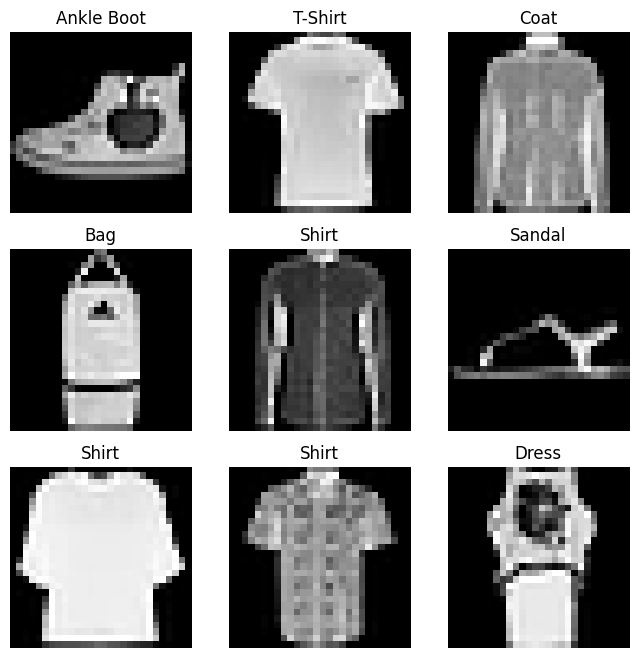

In [17]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot"
}

figure = plt.figure(figsize=(8,8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]

    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis('off')
    plt.imshow(img.squeeze(), cmap='gray')
    
plt.show()

### Creating a custom dataset for your files

A custom Dataset class must implement three functions, `__init__`, `__len__`, and `__getitem__`.

- `__init__` function is run when instantiating the Dataset object
- `__len__` function returns the number of samples in our dataset
- `__getitem__` function loads and returns a sample from the dataset at the given index `idx`

In [18]:
class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)
    
    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]

        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)

        return image, label

### Preparing data for training with DataLoaders

The Dataset retrieves our dataset's features and labels one sample at a time. While training a model, we typically want to pass samples in 'minibatches', reshuffle the data at every epoch to reduce model overfitting, and use Python's multiprocessing to speed up data retrieval. 

In [54]:
train_dataloader = DataLoader(training_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)

`train_dataloader` is an iterable, each iteration returns a batch of `train_features` and `train_labels`.

## Transforms
Data does not always come in its final processed form that is required for training machine learning algorithms. We use transforms to perform some manipulation of the data and make it suitable for training.

All TorchVision datasets have two parameters - `transform` to modify the features, and `target_transform` to modify the labels.

`torchvision.transforms` offers several commonly used transforms out of the box. 

The FashionMNIST features are in PIL image format, and the labels are integers. We need the features as normalised tensors, and the labels as one-hot encoded tensors.

In [22]:
ds = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
)

## Build the Neural Network

Neural networks comprise of layers/modules that perform operations on data. The `torch.nn` namespace provides all the building blocks you need to build your own neural network.

### Get Device for Training

Check if `torch.cuda` or `torch.backend.mps` are available, otherwise use CPU.

In [26]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)

print(f"Using {device} device")

Using cuda device


### Define the Class

We define our neural networks by subclassing `nn.Module`, and initialising the neural network layers in `__init__`. Every `nn.Module` subclass implements the operations on imput data in the `forward` method.

In [30]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        # Call the constructor of the parent class
        super().__init__()
        # Convert the multidimensional input data into a flat vector
        self.flatten = nn.Flatten()
        # Define a sequence of layers that will be applied in order
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    # Forward pass of the neural network
    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [31]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


To use the model, we pass it the input data. This executes `forward`, along with some background operations. Don't call `model.forward` directly!

Calling the model on the input returns a 2-dimensional tensor with dim=0 corresponding to each output of 10 raw predicted values for each class, and dim1 corresponding to the individual values of each output.

We get the prediction probabilities by passing it through an instance of the `nn.Softmax` module.

In [33]:
X = torch.rand(1, 28, 28, device=device)
logits = model(X)
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)

print(f'Predicted class: {y_pred}')

Predicted class: tensor([9], device='cuda:0')


### Model Layers

Lets break down the layers in the FashionMNIST model. To illustrate it, we will take a sample minibatch of 3 images of size 28x28 and see what happens to it as we pass through the network.

In [40]:
input_image = torch.rand(3, 28, 28)
print(input_image.size())

torch.Size([3, 28, 28])


#### nn.Flatten
We initialise the `nn.Flatten` layer to convert each 2D 28x28 image into a contiguous array of 784 pixel values.

In [38]:
flatten = nn.Flatten()
flat_image = flatten(input_image)
print(flat_image.size())

torch.Size([3, 784])


#### nn.Linear

Applies a linear transformation on the input using its stored weights and biases. 

In [39]:
layer1 = nn.Linear(in_features=28*28, out_features=20)
hidden1 = layer1(flat_image)
print(hidden1.size())

torch.Size([3, 20])


#### nn.ReLU

Non-linear activations are what create the complex mappings between the model's inputs and outputs. They are applied after linear transformations to introduce *nonlinearity*, helping neural networks learn a wide variety of phenomena. 

In [41]:
print(f'Before ReLU: {hidden1}\n\n')
hidden1 = nn.ReLU()(hidden1)
print(f'After ReLU: {hidden1}')

Before ReLU: tensor([[-0.0122, -0.1563, -0.3748,  0.2833,  0.1371,  0.4365, -0.1422,  0.1406,
         -0.4617,  0.3461,  0.0291, -0.5032,  0.2111,  0.4624, -0.1422, -0.9650,
         -0.4828,  0.3105,  0.2090, -0.0825],
        [ 0.0570,  0.1801, -0.0668, -0.2199, -0.1887,  0.3558, -0.0784,  0.0774,
         -0.0133,  0.2147,  0.0849, -0.6314,  0.2247,  0.4968, -0.2722, -0.6856,
         -0.3613,  0.2745,  0.1639,  0.3564],
        [ 0.0508, -0.0383, -0.2446, -0.2077,  0.0045,  0.7524,  0.1269, -0.0858,
         -0.1136,  0.0432,  0.0063, -0.3551,  0.3653,  0.3212, -0.3229, -0.8488,
         -0.5072, -0.0078, -0.2196,  0.1127]], grad_fn=<AddmmBackward0>)


After ReLU: tensor([[0.0000, 0.0000, 0.0000, 0.2833, 0.1371, 0.4365, 0.0000, 0.1406, 0.0000,
         0.3461, 0.0291, 0.0000, 0.2111, 0.4624, 0.0000, 0.0000, 0.0000, 0.3105,
         0.2090, 0.0000],
        [0.0570, 0.1801, 0.0000, 0.0000, 0.0000, 0.3558, 0.0000, 0.0774, 0.0000,
         0.2147, 0.0849, 0.0000, 0.2247, 0.4968, 0.00

#### nn.Sequential

An ordered container of modules. The data is passed through all the modules in the same order as defined.

In [42]:
seq_modules = nn.Sequential(
    flatten,
    layer1,
    nn.ReLU(),
    nn.Linear(20, 10)
)
input_image = torch.rand(3, 28, 28)
logits = seq_modules(input_image)

#### nn.Softmax

The last linear layer of the nn returns logits - raw values in $(-\inf, \inf )$ whcih are passed to the `nn.Softmax` module. They are scaled to values $[1, 10]$ representing the modules predicted probabilities for each class. `dim` parameters indicate the the dimension along which the values must sum to 1.

In [43]:
softmax = nn.Softmax(dim=1)
pred_probab = softmax(logits)

### Model Parameters

Many layers inside a neural network are parameterised, i.e. have associated weights and biases that are optimised during training. Subclassing `nn.Module` automatically tracks all fields defined inside your model object, and makes all parameters accesible using your model's `parameters()` or `named_parameters()` methods. 

In [44]:
print(f'Model Structure: {model}\n\n')

for name, param in model.named_parameters():
    print(f'Layer: {name} | Size: {param.size()} | Values: {param[:2]} \n')

Model Structure: NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


Layer: linear_relu_stack.0.weight | Size: torch.Size([512, 784]) | Values: tensor([[-0.0336, -0.0308,  0.0102,  ...,  0.0075,  0.0252,  0.0338],
        [ 0.0300, -0.0332, -0.0319,  ...,  0.0160,  0.0347,  0.0057]],
       device='cuda:0', grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.0.bias | Size: torch.Size([512]) | Values: tensor([ 0.0165, -0.0007], device='cuda:0', grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.2.weight | Size: torch.Size([512, 512]) | Values: tensor([[-0.0426, -0.0055, -0.0256,  ..., -0.0396, -0.0243, -0.0113],
        [ 0.0137, -0.0153,  0.0105,  ...,  0.0157, -0.0111,  0.0137]],
       device='cuda:0', grad_fn=<Slice

## Automatic Differentiation with `torch.autograd`

When training neural networks, the most frequently used algorithm is *back propagation*. Model weights are adjusted according to the gradient of the loss function wrt the given parameter.

To compute these gradients, PyTorch has a built-in differentiation engine called `torch-autograd`. It supports automatic computation of gradient for any computation graph. 

In [50]:
x = torch.ones(5) # input tensor
y = torch.zeros(3) # expected output
w = torch.randn(5, 3, requires_grad=True)
b = torch.randn(3, requires_grad=True)
z = torch.matmul(x, w) + b
loss = torch.nn.functional.binary_cross_entropy_with_logits(z, y)

In [51]:
print(f'Gradient function for z = {z.grad_fn}')
print(f'Gradient function for loss = {loss.grad_fn}')

Gradient function for z = <AddBackward0 object at 0x0000025564411E40>
Gradient function for loss = <BinaryCrossEntropyWithLogitsBackward0 object at 0x00000255633ED930>


### Computing Gradients

To optimise weights, we need to compute derivatives of our loss function with respect to parameters. 

In [52]:
loss.backward()
print(w.grad)
print(b.grad)

tensor([[0.0006, 0.2967, 0.0180],
        [0.0006, 0.2967, 0.0180],
        [0.0006, 0.2967, 0.0180],
        [0.0006, 0.2967, 0.0180],
        [0.0006, 0.2967, 0.0180]])
tensor([0.0006, 0.2967, 0.0180])


### Disabling Gradient Tracking

By default, all tensors with requires_grad=True are tracking their computational history and support gradient computation. However, there are some cases when we do not need to do that, e.g., when we have trained the model and just want to apply it to some input data.

In [53]:
z = torch.matmul(x, w) + b

print(z.requires_grad)

with torch.no_grad():
    z = torch.matmul(x, w) + b

print(z.requires_grad)

True
False


## Optimising Model Parameters

Now that we have a model and data, it's time to train, validate, and test out model. This is an iterative process; in each iteration the model makes a geuss about the output, calculates the error in its guess (loss), collects the derivatives of the error with respect to its parameters, and optimises those parameters using gradient descent. 

In [83]:
# Reload the previous code

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

train_dataloader = DataLoader(training_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)

class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)

### Hyperparameters

Adjustable parameters that let you control the model optimisation process. Different hyperparameter values can impact model training and convergence rates.

We define three hyperparameters for training:
- **Number of Epochs** - the number of times to iterate over the dataset
- **Batch Size** - the number of data samples propagated through the network before the parameters are updated
- **Learning Rate** - how much to update model parameters at each batch/epoch. Smaller values yield slow learning speed, whilst large values may result in unpredictable behaviour during training

In [84]:
learning_rate = 1e-3
batch_size = 64
epochs = 5

### Optimisation Loop

Once we set our hyperparameters, we can then train and optimise our model with an optimisation loop. Each iteration of the optimisation loop is called an epoch.

Each epoch consists of two main parts:
- **The Train Loop** - iterate over the training dataset and try to converge to optimal parameters
- **The Validation Test**  - iterate over the test dataset to check if model performance is improving

#### Loss Function
Measures the degree of dissimilarity of obtained result to the target value, we want to minimise this during training. 

Some common loss functions are
- `nn.MSElLoss` (Mean Square Error) for regression tasks
- `nn.NLLLoss` (Negative Log Likelihood) for classification
- `nn.CrossEntropyLoss` combines `nn.LogSoftmax` and `nn.NLLLoss`.

In [85]:
# Initialise the Loss Function
loss_fn = nn.CrossEntropyLoss()

#### Optimiser

Stochastic Gradient Descent (SGD) is the optimisation algorithm we choose to use here. There are many different options available. 

In [86]:
# Initialise the optimiser
optimiser = torch.optim.SGD(model.parameters(), lr=learning_rate)

Inside the training loop, optimisation happens in three steps:
- Call `optimiser.zero_grad()` to reset the gradients of model parameters. Gradients by default add up; to prevent double-counting, we explicitely zero them at each iteration
- Backpropagate the prediction loss with a call to `loss.backward()`
- Once we have our gradients, call `optimiser.step()` to adjust the parameters by the gradients collected in the backward pass. 

### Full Implementation

In [90]:
def train_loop(dataloader, model, loss_fn, optimiser):
    size = len(dataloader.dataset)
    
    # Set the model to rtaining mode - important for batch normalisation and dropout layers
    model.train()

    for batch, (X, y) in enumerate(dataloader):
        # Move data to the appropriate device
        X, y = X.to(device), y.to(device)

        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimiser.step()
        optimiser.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f'loss: {loss:>7f} [{current:>5d} / {size:>5d}]')

def test_loop(dataloader, model, loss_fn):
    # Set the model to evaluation mode
    model.eval()

    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    # Ensure no gradients are computed during test mode
    with torch.no_grad():
        for X, y in dataloader:
            # Move data to the appropriate device
            X, y = X.to(device), y.to(device)

            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size

    print(f'Test Error: \n Accuracy: {100*correct:>0.1f}%, Avg loss: {test_loss:>8f} \n')


In [91]:
loss_fn = nn.CrossEntropyLoss()
optimiser = torch.optim.SGD(model.parameters(), lr=learning_rate)

epochs = 10
for t in range(epochs):
    print(f'Epoch {t+1}')
    print('-'*40)
    train_loop(train_dataloader, model, loss_fn, optimiser)
    test_loop(test_dataloader, model, loss_fn)

print('Done!')


Epoch 1
----------------------------------------
loss: 2.163063 [   64 / 60000]
loss: 2.153324 [ 6464 / 60000]
loss: 2.095211 [12864 / 60000]
loss: 2.115778 [19264 / 60000]
loss: 2.058403 [25664 / 60000]
loss: 1.989292 [32064 / 60000]
loss: 2.027924 [38464 / 60000]
loss: 1.934805 [44864 / 60000]
loss: 1.955575 [51264 / 60000]
loss: 1.875955 [57664 / 60000]
Test Error: 
 Accuracy: 56.6%, Avg loss: 1.876890 

Epoch 2
----------------------------------------
loss: 1.917874 [   64 / 60000]
loss: 1.880631 [ 6464 / 60000]
loss: 1.766877 [12864 / 60000]
loss: 1.813779 [19264 / 60000]
loss: 1.695910 [25664 / 60000]
loss: 1.649460 [32064 / 60000]
loss: 1.676372 [38464 / 60000]
loss: 1.570293 [44864 / 60000]
loss: 1.608298 [51264 / 60000]
loss: 1.500020 [57664 / 60000]
Test Error: 
 Accuracy: 60.3%, Avg loss: 1.516606 

Epoch 3
----------------------------------------
loss: 1.593042 [   64 / 60000]
loss: 1.547595 [ 6464 / 60000]
loss: 1.404408 [12864 / 60000]
loss: 1.476381 [19264 / 60000]
loss:

### Save and Load the Model

We can save the optimised weights.

In [92]:
torch.save(model.state_dict(), 'model_weights.pth')

To load model weights, you need to create an instance of the same model first, then use

In [93]:
trained_model = NeuralNetwork()
trained_model.load_state_dict(torch.load('model_weights.pth'))
trained_model.eval()

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)

We can save the structure of the model class together with the weights

In [94]:
torch.save(model, 'model.pth')

In [96]:
trained_model_2 = torch.load('model.pth')
trained_model_2.eval()

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)